<a href="https://colab.research.google.com/github/nahin333/DL-practice-codes/blob/main/cifar10_ann_vs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt
import numpy as np

In [21]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [22]:
X_test.shape

(10000, 32, 32, 3)

In [23]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [25]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [26]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

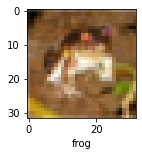

In [27]:
plot_sample(X_train, y_train, 0)

In [28]:
X_train = X_train / 255
X_test = X_test / 255

#ANN

In [29]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8094 - accuracy: 0.3563
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6250 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5420 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4821 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4335 - accuracy: 0.4952


In [31]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4666 - accuracy: 0.4847


[1.466550350189209, 0.4846999943256378]

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.66      0.55      1000
           1       0.64      0.59      0.61      1000
           2       0.37      0.35      0.36      1000
           3       0.36      0.31      0.33      1000
           4       0.54      0.25      0.34      1000
           5       0.38      0.42      0.40      1000
           6       0.40      0.76      0.52      1000
           7       0.56      0.54      0.55      1000
           8       0.67      0.55      0.60      1000
           9       0.68      0.42      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [33]:
y_predicted = ann.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

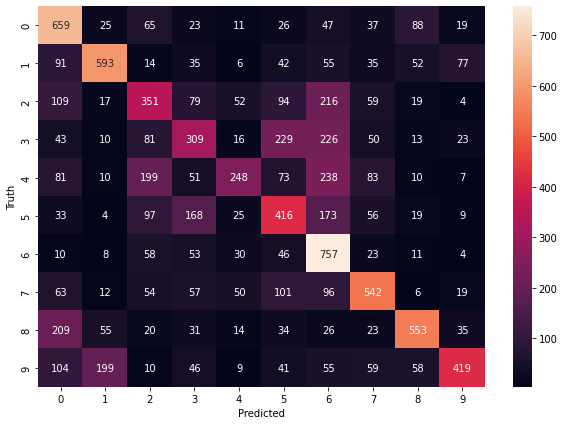

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#CNN

In [35]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape= (32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [36]:
cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5375 - accuracy: 0.4474
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1910 - accuracy: 0.5780
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0618 - accuracy: 0.6261
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9762 - accuracy: 0.6583
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9130 - accuracy: 0.6805
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8605 - accuracy: 0.6992
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8170 - accuracy: 0.7154
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7798 - accuracy: 0.7270
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7405 - accuracy: 0.7405
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

In [38]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9636 - accuracy: 0.6751


[0.9635962843894958, 0.6751000285148621]

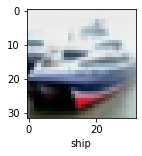

In [39]:
plot_sample(X_test, y_test, 1)

In [40]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.3627650e-04, 1.1726797e-05, 1.1018977e-03, 8.0058527e-01,
        1.0993559e-03, 1.7788996e-01, 1.5647933e-04, 2.1944646e-04,
        1.8651873e-02, 1.4760488e-04],
       [3.4171149e-02, 3.7570921e-01, 1.6034866e-06, 4.6621976e-06,
        7.7451523e-07, 6.8407007e-07, 6.2177395e-07, 3.9855188e-08,
        5.8895284e-01, 1.1584754e-03],
       [1.3521604e-02, 8.0730747e-03, 3.8835148e-03, 3.6384035e-03,
        9.9567836e-04, 5.2442495e-04, 2.3645523e-03, 4.6559444e-04,
        9.6575314e-01, 7.7996223e-04],
       [3.9111218e-01, 7.6332553e-03, 2.3270709e-02, 9.1009783e-03,
        2.6203657e-03, 3.2024478e-04, 6.5684179e-04, 1.1351107e-04,
        5.6421030e-01, 9.6162484e-04],
       [6.0742673e-07, 1.2990415e-05, 2.0393930e-02, 2.0156571e-01,
        3.3087596e-01, 2.1600393e-03, 4.4145960e-01, 4.1928379e-05,
        3.4745731e-03, 1.4685533e-05]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

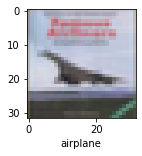

In [43]:
plot_sample(X_test, y_test, 3)

In [44]:
classes[y_classes[3]]

'ship'

In [45]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.67      0.72      1000
           1       0.88      0.71      0.79      1000
           2       0.56      0.58      0.57      1000
           3       0.45      0.57      0.51      1000
           4       0.68      0.51      0.58      1000
           5       0.56      0.60      0.58      1000
           6       0.79      0.75      0.77      1000
           7       0.68      0.76      0.71      1000
           8       0.72      0.83      0.77      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [46]:
y_predicted = cnn.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

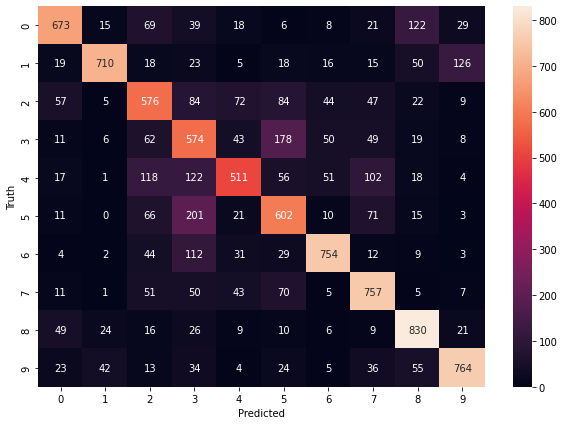

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')